In [1]:
#датасет ра https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data
import pandas as pd
#загрузка датасетов  train и test
train = pd.read_csv('train.csv',low_memory=True)
test = pd.read_csv('test.csv',low_memory=True)

In [2]:
test['is_train'] = 0
train['is_train'] = 1

In [3]:
#объединение выборок train, test
df_combine = pd.concat([train, test], axis=0, ignore_index=True)
#удаление метки target
df_combine = df_combine.drop('target', axis =1)

y = df_combine['is_train'].values #индикатор источника 
x = df_combine.drop('is_train', axis=1).values #объединенный датасет

tst, trn = test.values, train.values

In [4]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rfc = RandomForestClassifier(n_jobs=-1, max_depth=5, min_samples_leaf = 5)
predictions = np.zeros(y.shape) #пустой массив для вероятностей классов

In [5]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=100)
for fold, (train_idx, test_idx) in enumerate(skf.split(x, y)):
    X_train, X_test = x[train_idx], x[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
 
    rfc.fit(X_train, y_train)
    probs = rfc.predict_proba(X_test)[:, 1] #предсказание вероятностей классов
    predictions[test_idx] = probs

In [9]:
from sklearn.metrics import roc_auc_score
print('ROC-AUC:', roc_auc_score(y_true=y, y_score=predictions))

# ROC-AUC: 0.49974692698385287

ROC-AUC: 0.49974692698385287


In [6]:
predictions[:10]
#array([0.39743827 ...

array([0.39743827, 0.39323545, 0.39257706, 0.32718403, 0.39253767,
       0.45088823, 0.39223263, 0.39373625, 0.44240599, 0.35812497])

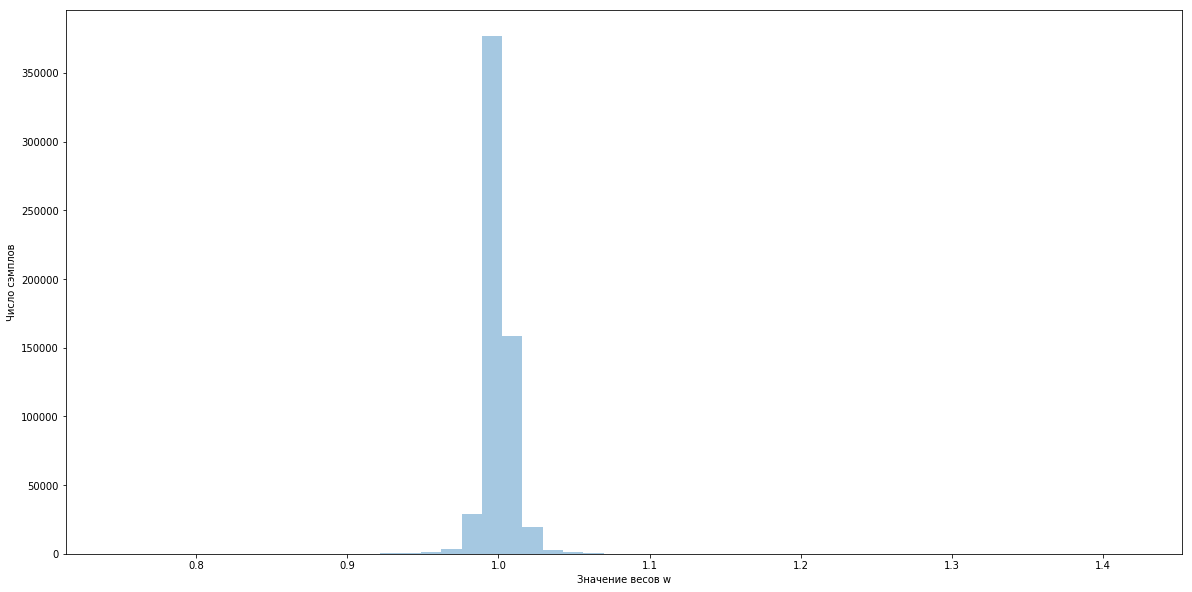

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
predictions_train = predictions[len(tst):] 
weights = (1./predictions_train) - 1. 
weights /= np.mean(weights) # Нормализация весов

plt.xlabel('Значение весов w')
plt.ylabel('Число сэмплов')
sns.distplot(weights, kde=False)